In [11]:
from qiskit_ibm_runtime import Estimator
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from src.observable import create_parametrized_hermitian_matrix, hermitian_to_sparsepauliop, random_complex_vector, assign_parameters_to_matrix
from src.run_estimator import run_estimator

# Make the observable

In [12]:

n_qubits = 3

In [13]:
# Create a parametrized observable
N = 2**n_qubits
matrix = create_parametrized_hermitian_matrix(N)


In [14]:
n_params = N**2
params = random_complex_vector(n_params, seed=0)

In [15]:
assigned_matrix = assign_parameters_to_matrix(matrix, params)
sparse_pauli_op = hermitian_to_sparsepauliop(assigned_matrix, n_qubits)

In [16]:
sparse_pauli_op

SparsePauliOp(['III', 'IIX', 'IIY', 'IIZ', 'IXI', 'IXX', 'IXY', 'IXZ', 'IYI', 'IYX', 'IYY', 'IYZ', 'IZI', 'IZX', 'IZY', 'IZZ', 'XII', 'XIX', 'XIY', 'XIZ', 'XXI', 'XXX', 'XXY', 'XXZ', 'XYI', 'XYX', 'XYY', 'XYZ', 'XZI', 'XZX', 'XZY', 'XZZ', 'YII', 'YIX', 'YIY', 'YIZ', 'YXI', 'YXX', 'YXY', 'YXZ', 'YYI', 'YYX', 'YYY', 'YYZ', 'YZI', 'YZX', 'YZY', 'YZZ', 'ZII', 'ZIX', 'ZIY', 'ZIZ', 'ZXI', 'ZXX', 'ZXY', 'ZXZ', 'ZYI', 'ZYX', 'ZYY', 'ZYZ', 'ZZI', 'ZZX', 'ZZY', 'ZZZ'],
              coeffs=[ 0.53560925+0.j,  0.59919467+0.j, -0.0607665 +0.j,  0.00137643+0.j,
  0.49540263+0.j,  0.43008997+0.j,  0.0164206 +0.j,  0.14337329+0.j,
  0.03662401+0.j, -0.03129267+0.j,  0.0541031 +0.j, -0.12589923+0.j,
  0.0181379 +0.j,  0.14144354+0.j,  0.20104389+0.j,  0.02533102+0.j,
  0.53659614+0.j,  0.5114847 +0.j,  0.1462997 +0.j, -0.05872583+0.j,
  0.3207165 +0.j,  0.57698772+0.j,  0.08863264+0.j,  0.11688942+0.j,
 -0.00158085+0.j,  0.00729372+0.j, -0.09410357+0.j, -0.13324884+0.j,
  0.02401229+0.j,  0.02398543+0.

# Create a circuit

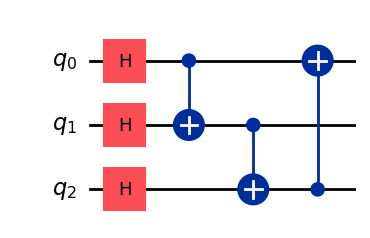

In [17]:
# Create a circuit of all H's followed by a CNOT circular chain
qc = QuantumCircuit(n_qubits)
qc.h(range(n_qubits))
for i in range(n_qubits):
    qc.cx(i, (i + 1) % n_qubits)
    
qc.draw('mpl', fold=-1)


# Run on Estimator

In [18]:
shots = 100_000
pubs = [(qc, sparse_pauli_op)]

result = run_estimator(pubs, shots)

In [19]:
result[0].data.evs.tolist()

4.011913056376304